# Neural Networks with Keras

In [1]:
from __future__ import print_function
import random
import numpy as np
import pandas as pd
from math import sin

# pip install keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import sklearn.model_selection as cv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)
plt.style.use('ggplot')
import seaborn as sns

Using TensorFlow backend.


## Neural Network Regression

### Polynomial Regression

Let's train a neural network on a few different shapes. First we start with a polynomial (a cubic).

Data Dimension:
X: (1000, 1)
y: (1000, 1)


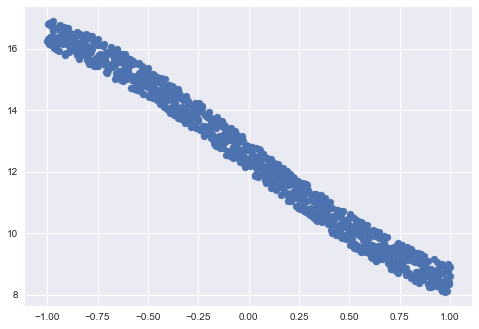

In [2]:
# Create some data
def f(x):
    return x ** 3 - 5 * x + 12 + random.random()

X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.array(map(f, X))

print('Data Dimension:')
print('X: {}\ny: {}'.format(X.shape, y.shape))
plt.scatter(X, y);

### How to define a simple feed-forward Neural Network

In [3]:
# with a single input and a 5-dimensional hidden layer
model = Sequential()
model.add(Dense(input_dim=1, units=5, name='hidden'))
model.add(Activation('tanh', name='tanh'))
model.add(Dense(units=1, name='output'))
model.add(Activation('linear', name='linear'))
model.summary()

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 5)                 10        
_________________________________________________________________
tanh (Activation)            (None, 5)                 0         
_________________________________________________________________
output (Dense)               (None, 1)                 6         
_________________________________________________________________
linear (Activation)          (None, 1)                 0         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


### ... and how to simplify the code

In [4]:
# formulate model as a list of layers, including activation functions
model = Sequential(layers=
    [Dense(input_dim=1,units=5, activation='tanh', name='hidden'), # include activation in layer
     Dense(units=1, name='output')                                 # 'linear' is default activation
    ])
model.summary()

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 5)                 10        
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train the model
print('Training...')
loss = model.fit(X, y, 
                 epochs=500,           # number of iterations throught the dataset
                 validation_split=0.1, # train/test split
                 batch_size=128,       # number of random samples to do gradient descent on
                 verbose=1)            # print loss after each epoch

print('Final trainig loss: {:.10f}'.format(loss.history['loss'][-1]))
print('Final validation loss: {:.10f}'.format(loss.history['val_loss'][-1]))
print("Done")

Training...
Train on 900 samples, validate on 100 samples
Epoch 1/500
900/900 [==============================] - 0s - loss: 119.6373 - val_loss: 13.7880
Epoch 2/500
900/900 [==============================] - 0s - loss: 28.0540 - val_loss: 0.0933
Epoch 3/500
900/900 [==============================] - 0s - loss: 6.9184 - val_loss: 2.0000
Epoch 4/500
900/900 [==============================] - 0s - loss: 3.1222 - val_loss: 2.1823
Epoch 5/500
900/900 [==============================] - 0s - loss: 2.2477 - val_loss: 0.9072
Epoch 6/500
900/900 [==============================] - 0s - loss: 1.7282 - val_loss: 0.2813
Epoch 7/500
900/900 [==============================] - 0s - loss: 1.2513 - val_loss: 0.1271
Epoch 8/500
900/900 [==============================] - 0s - loss: 0.9463 - val_loss: 0.2677
Epoch 9/500
900/900 [==============================] - 0s - loss: 0.7088 - val_loss: 0.6160
Epoch 10/500
900/900 [==============================] - 0s - loss: 0.5695 - val_loss: 0.8841
Epoch 11/500
900/

900/900 [==============================] - 0s - loss: 0.0903 - val_loss: 0.2296
Epoch 89/500
900/900 [==============================] - 0s - loss: 0.0896 - val_loss: 0.2383
Epoch 90/500
900/900 [==============================] - 0s - loss: 0.0897 - val_loss: 0.2343
Epoch 91/500
900/900 [==============================] - 0s - loss: 0.0900 - val_loss: 0.1847
Epoch 92/500
900/900 [==============================] - 0s - loss: 0.0888 - val_loss: 0.1775
Epoch 93/500
900/900 [==============================] - 0s - loss: 0.0889 - val_loss: 0.1737
Epoch 94/500
900/900 [==============================] - 0s - loss: 0.0892 - val_loss: 0.1857
Epoch 95/500
900/900 [==============================] - 0s - loss: 0.0888 - val_loss: 0.1568
Epoch 96/500
900/900 [==============================] - 0s - loss: 0.0888 - val_loss: 0.1379
Epoch 97/500
900/900 [==============================] - 0s - loss: 0.0905 - val_loss: 0.1921
Epoch 98/500
900/900 [==============================] - 0s - loss: 0.0885 - val_los

900/900 [==============================] - 0s - loss: 0.0877 - val_loss: 0.1618
Epoch 175/500
900/900 [==============================] - 0s - loss: 0.0874 - val_loss: 0.1392
Epoch 176/500
900/900 [==============================] - ETA: 0s - loss: 0.092 - 0s - loss: 0.0878 - val_loss: 0.1520
Epoch 177/500
900/900 [==============================] - 0s - loss: 0.0874 - val_loss: 0.1557
Epoch 178/500
900/900 [==============================] - 0s - loss: 0.0876 - val_loss: 0.1359
Epoch 179/500
900/900 [==============================] - 0s - loss: 0.0874 - val_loss: 0.1419
Epoch 180/500
900/900 [==============================] - 0s - loss: 0.0873 - val_loss: 0.1312
Epoch 181/500
900/900 [==============================] - 0s - loss: 0.0878 - val_loss: 0.1444
Epoch 182/500
900/900 [==============================] - 0s - loss: 0.0873 - val_loss: 0.1378
Epoch 183/500
900/900 [==============================] - 0s - loss: 0.0875 - val_loss: 0.1464
Epoch 184/500
900/900 [===========================

900/900 [==============================] - 0s - loss: 0.0883 - val_loss: 0.1403
Epoch 262/500
900/900 [==============================] - 0s - loss: 0.0874 - val_loss: 0.1365
Epoch 263/500
900/900 [==============================] - 0s - loss: 0.0874 - val_loss: 0.1353
Epoch 264/500
900/900 [==============================] - 0s - loss: 0.0873 - val_loss: 0.1497
Epoch 265/500
900/900 [==============================] - 0s - loss: 0.0877 - val_loss: 0.1185
Epoch 266/500
900/900 [==============================] - 0s - loss: 0.0877 - val_loss: 0.1262
Epoch 267/500
900/900 [==============================] - 0s - loss: 0.0876 - val_loss: 0.1567
Epoch 268/500
900/900 [==============================] - 0s - loss: 0.0876 - val_loss: 0.1494
Epoch 269/500
900/900 [==============================] - 0s - loss: 0.0873 - val_loss: 0.1470
Epoch 270/500
900/900 [==============================] - 0s - loss: 0.0875 - val_loss: 0.1440
Epoch 271/500
900/900 [==============================] - 0s - loss: 0.0874

900/900 [==============================] - 0s - loss: 0.0880 - val_loss: 0.1536
Epoch 348/500
900/900 [==============================] - 0s - loss: 0.0874 - val_loss: 0.1731
Epoch 349/500
900/900 [==============================] - 0s - loss: 0.0875 - val_loss: 0.1512
Epoch 350/500
900/900 [==============================] - 0s - loss: 0.0872 - val_loss: 0.1572
Epoch 351/500
900/900 [==============================] - 0s - loss: 0.0874 - val_loss: 0.1718
Epoch 352/500
900/900 [==============================] - 0s - loss: 0.0879 - val_loss: 0.1630
Epoch 353/500
900/900 [==============================] - 0s - loss: 0.0875 - val_loss: 0.1178
Epoch 354/500
900/900 [==============================] - 0s - loss: 0.0891 - val_loss: 0.1256
Epoch 355/500
900/900 [==============================] - 0s - loss: 0.0886 - val_loss: 0.1292
Epoch 356/500
900/900 [==============================] - 0s - loss: 0.0876 - val_loss: 0.1533
Epoch 357/500
900/900 [==============================] - 0s - loss: 0.0874

900/900 [==============================] - 0s - loss: 0.0874 - val_loss: 0.1435
Epoch 435/500
900/900 [==============================] - 0s - loss: 0.0873 - val_loss: 0.1471
Epoch 436/500
900/900 [==============================] - 0s - loss: 0.0872 - val_loss: 0.1372
Epoch 437/500
900/900 [==============================] - 0s - loss: 0.0877 - val_loss: 0.1252
Epoch 438/500
900/900 [==============================] - 0s - loss: 0.0873 - val_loss: 0.1406
Epoch 439/500
900/900 [==============================] - 0s - loss: 0.0872 - val_loss: 0.1443
Epoch 440/500
900/900 [==============================] - 0s - loss: 0.0880 - val_loss: 0.1167
Epoch 441/500
900/900 [==============================] - 0s - loss: 0.0877 - val_loss: 0.1285
Epoch 442/500
900/900 [==============================] - 0s - loss: 0.0873 - val_loss: 0.1211
Epoch 443/500
900/900 [==============================] - 0s - loss: 0.0877 - val_loss: 0.1474
Epoch 444/500
900/900 [==============================] - 0s - loss: 0.0879

In [6]:
def plot_predictions(model, X, y):
    """Plot predictions vs actuals and print MSE"""
    predictions = model.predict(X)                   
    plt.scatter(X, y, alpha=.5, c='red', label='actual')
    plt.plot(X, predictions, color='black', label='predicted')
    plt.legend()
    plt.title('Predicted vs Actuals | MSE: {:.2f}'.format(mean_squared_error(predictions, y)));

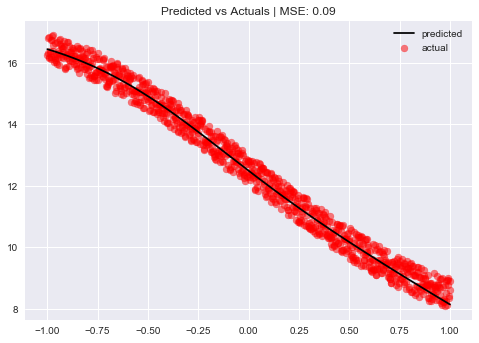

In [7]:
plot_predictions(model, X, y)

In [8]:
def plot_loss(data, loss='MSE'):
    """Plot training and validation loss over time"""    
    df = pd.DataFrame(data.history).reset_index().rename(columns={'index': 'Epoch'})
    fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True, sharey=True)
    df.plot.scatter(x='Epoch', y='loss', ax=axes[0], title='Training Loss')
    axes[0].set_ylabel(loss)
    df.plot.scatter(x='Epoch', y='val_loss', ax=axes[1], c='red', title='Validation Loss')
    axes[1].set_ylabel(loss)
    plt.tight_layout();

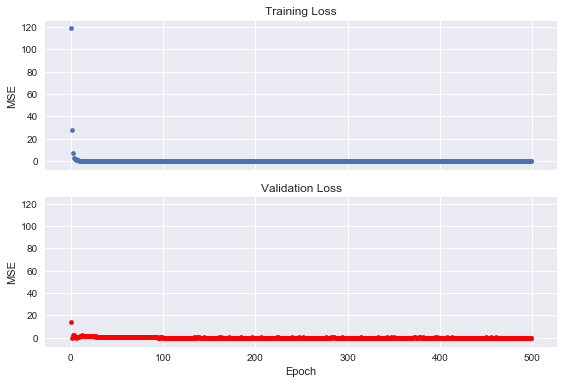

In [9]:
plot_loss(loss)

### Sine Regression

Data Dimension:
X: (1000, 1)
y: (1000, 1)


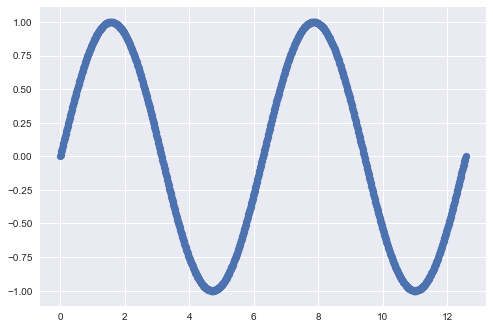

In [10]:
# Sine data
X = np.linspace(0, 4 * np.pi, 1000).reshape(-1,1)
y = np.sin(X)

print('Data Dimension:')
print('X: {}\ny: {}'.format(X.shape, y.shape))
plt.scatter(X, y);

In [11]:
# Create the model
model = Sequential()
model.add(Dense(input_dim=1, units=5, activation='tanh', name='hidden_1'))
model.add(Dense(units=9, activation='tanh', name='hidden_2'))
model.add(Dense(units=3, activation='tanh', name='hidden_3'))
model.add(Dense(units=1, activation='linear', name='output'))
model.summary()

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 5)                 10        
_________________________________________________________________
hidden_2 (Dense)             (None, 9)                 54        
_________________________________________________________________
hidden_3 (Dense)             (None, 3)                 30        
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


### Train the Model

In [12]:
def final_loss(loss):
    """Helper function to print final loss values"""
    print('Final trainig loss: {:.10f}'.format(loss.history['loss'][-1]))
    print('Final validation loss: {:.10f}'.format(loss.history['val_loss'][-1]))

In [13]:
print('Training..')
loss = model.fit(X, y, epochs=150, validation_split=0.1, 
                 batch_size=128, verbose=False)

final_loss(loss)

Training..
Final trainig loss: 0.3686564676
Final validation loss: 0.1298527867


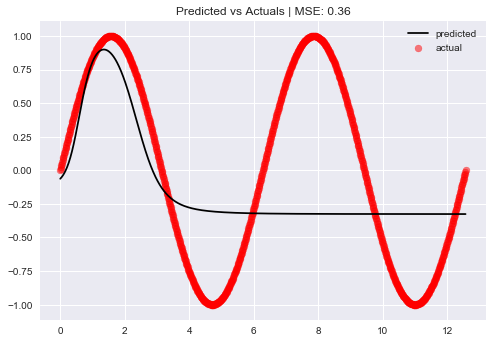

In [14]:
plot_predictions(model, X, y)

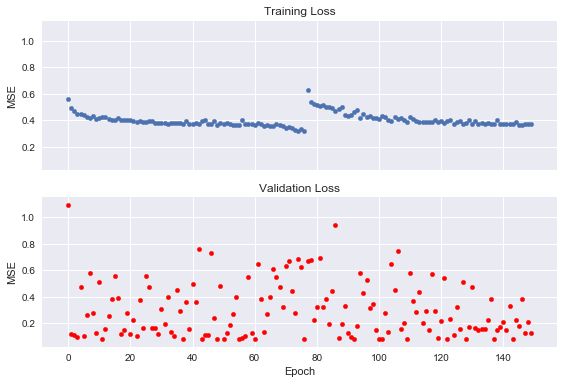

In [15]:
plot_loss(loss)

### Train longer

If we train for more epochs, we can get a better regression - even with a simpler model.

In [16]:
# Setting up the model
model = Sequential([
    Dense(input_dim=1, units=5, activation='tanh', name='hidden'),
    Dense(units=1, activation='linear', name='output')
])

model.summary()

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.05))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 5)                 10        
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [17]:
# using the same data
print('Training..')
loss = model.fit(X, y, 
                 epochs=15000, 
                 validation_split=0.1, 
                 batch_size=128, 
                 verbose=False)

final_loss(loss)

Training..
Final trainig loss: 0.0005200586
Final validation loss: 0.3758012056


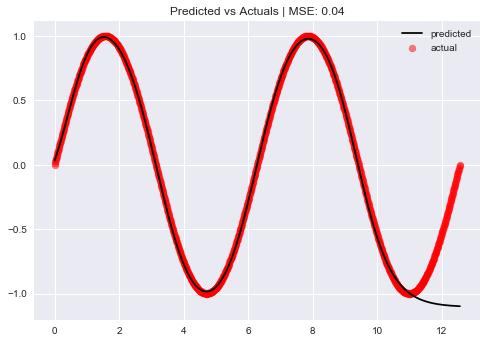

In [18]:
plot_predictions(model, X, y)

We can take a closer look at the error per training epoch.

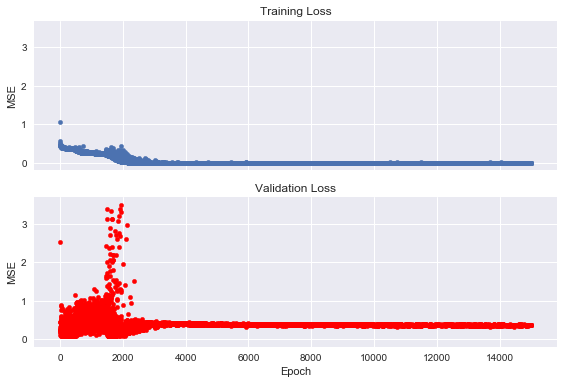

In [19]:
plot_loss(loss)

### Try again (also for longer) with the more complex model

In [20]:
# Create the model
model = Sequential()
model.add(Dense(input_dim=1, units=5, activation='tanh', name='hidden_1'))
model.add(Dense(units=9, activation='tanh', name='hidden_2'))
model.add(Dense(units=3, activation='tanh', name='hidden_3'))
model.add(Dense(units=1, activation='linear', name='output'))
model.summary()

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 5)                 10        
_________________________________________________________________
hidden_2 (Dense)             (None, 9)                 54        
_________________________________________________________________
hidden_3 (Dense)             (None, 3)                 30        
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


In [21]:
# using the same data
print('Training..')
loss = model.fit(X, y, 
                 epochs=15000, 
                 validation_split=0.1, 
                 batch_size=128, 
                 verbose=False)

final_loss(loss)

Training..
Final trainig loss: 0.2304710731
Final validation loss: 0.7165334821


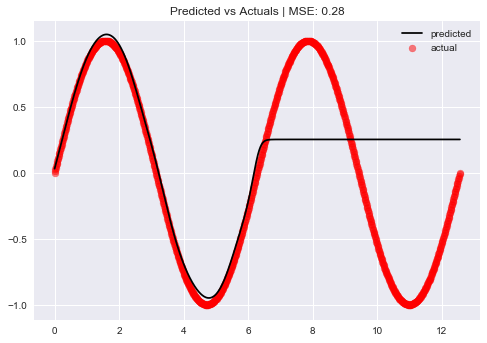

In [22]:
plot_predictions(model, X, y)

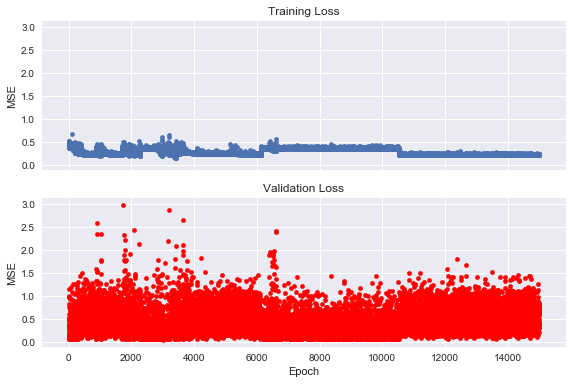

In [24]:
plot_loss(loss)

### Exercise: Perform regression using the following data
Hints:
* Try addinga hidden layer
* Try lowering the learning rate and using more epochs

In [29]:
def f(x):
    return x ** 2 * np.sin(x**2)

# Sine data
X = np.linspace(2, np.pi, 1000).reshape(-1,1)
y = np.array(list(map(f, X)))

print('Data Dimension:')
print('X: {}\ny: {}'.format(X.shape, y.shape))

Data Dimension:
X: (1000, 1)
y: (1000, 1)


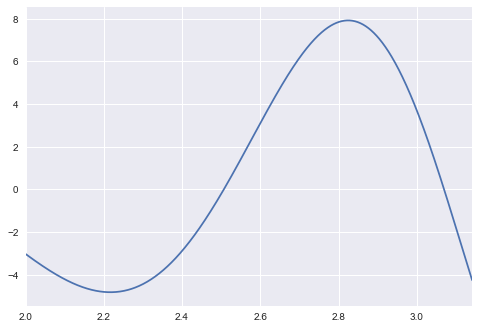

In [30]:
pd.DataFrame(y, index=X).squeeze().plot();

In [31]:
## Your Solution

# build model
model = Sequential()
#...

# compile
#   lr: learning rate

In [32]:
print('Training..')

# train
# print final loss

Training..


In [33]:
# plot predicted vs actuals

In [34]:
# plot loss over time

## Classification

We'll start with the Iris dataset (of course).

In [35]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

# Break each output into indicator cols
y_cat = pd.get_dummies(y).values

print('Data Dimension:')
print('X: {}\ny: {}'.format(X.shape, y_cat.shape))

Data Dimension:
X: (150, 4)
y: (150, 3)


In [36]:
# Define a model
model = Sequential()

# input_dim = number of neurons in first layer.
# units = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(input_dim=4, units=12, activation='tanh', name='hidden_1'))
model.add(Dense(units=6, activation='tanh', name='hidden_2'))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(units=3, activation='softmax', name='output'))
model.summary()

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.01))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 12)                60        
_________________________________________________________________
hidden_2 (Dense)             (None, 6)                 78        
_________________________________________________________________
output (Dense)               (None, 3)                 21        
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, 
                 epochs=5000, 
                 batch_size=16, 
                 verbose=False)

final_loss(loss)

Training...
Final trainig loss: 0.0105452023
Final validation loss: 0.0063639241


In [38]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

ACCURACY:  0.986666666667
CONFUSION MATRIX:
 [[50  0  0]
 [ 0 48  2]
 [ 0  0 50]]


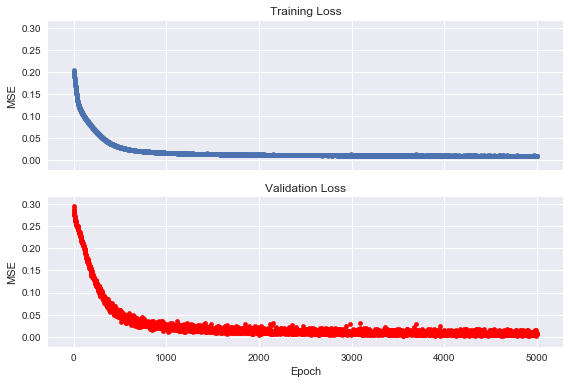

In [39]:
plot_loss(loss);

## Abalone data set

In [40]:
columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight",
           "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]
df = pd.read_csv("../data/abalone.data", names=columns)

df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


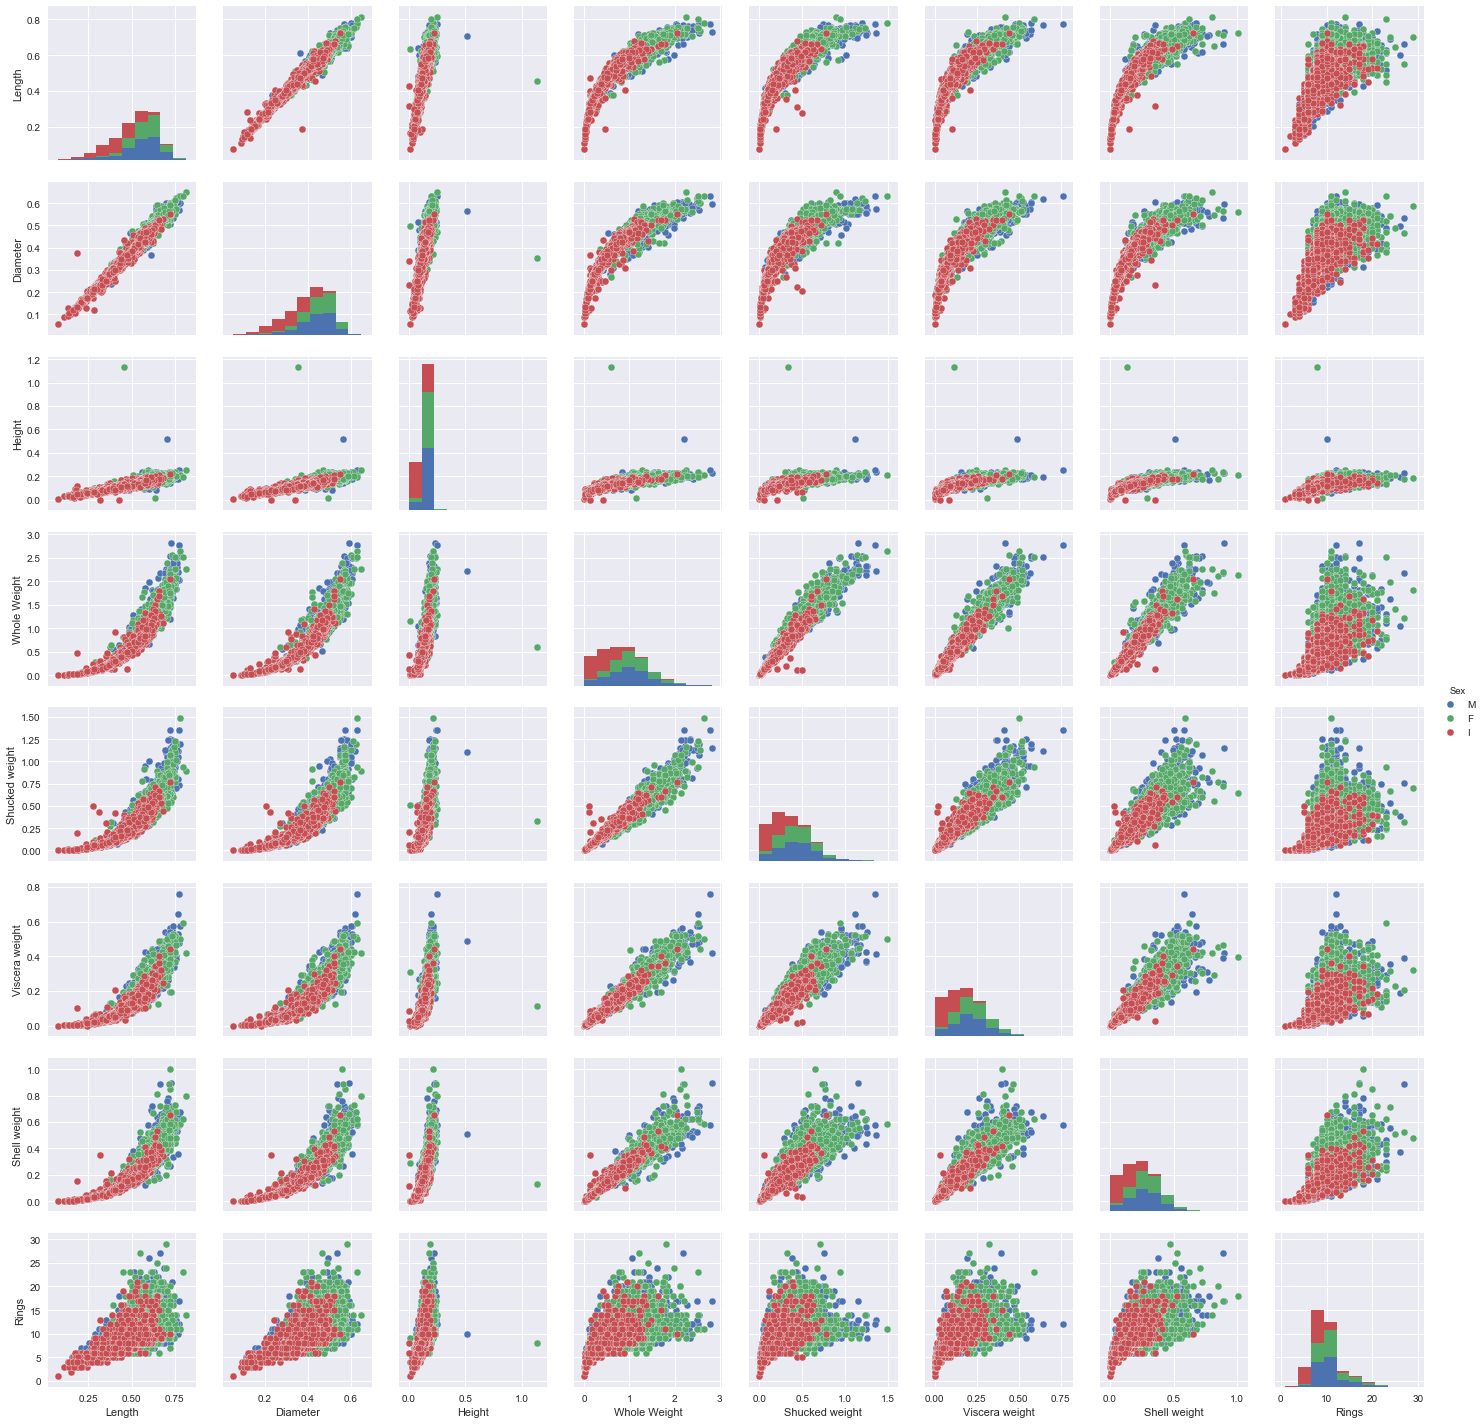

In [41]:
sns.pairplot(data=df, vars=columns[1:], hue="Sex");

In [42]:
d = {'M': 0, 'F': 1, 'I': 2}
df["Sex"] = df["Sex"].apply(lambda x: d[x])

In [43]:
X = np.array(df[columns[1:]])
y = np.array(df["Sex"])
y_cat = pd.get_dummies(y).values

print('Data Dimension:')
print('X: {}\ny: {}'.format(X.shape, y_cat.shape))

Data Dimension:
X: (4177, 8)
y: (4177, 3)


In [48]:
# Define a model
model = Sequential([
    Dense(input_dim=8, units=24, activation='tanh', name='hidden_1'),
    Dense(units=12, activation='tanh', name='hidden_2'),
    Dense(units=3, activation='softmax', name='output') # output_dim=no of classes; 'softmax' for class probability
])
model.summary()

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 24)                216       
_________________________________________________________________
hidden_2 (Dense)             (None, 12)                300       
_________________________________________________________________
output (Dense)               (None, 3)                 39        
Total params: 555
Trainable params: 555
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, 
                 epochs=5000, 
                 batch_size=16, 
                 verbose=False)

final_loss(loss)

Training...
Final trainig loss: 0.1683841152
Final validation loss: 0.1725572783


In [50]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

ACCURACY:  0.580081398133
CONFUSION MATRIX:
 [[ 855  414  259]
 [ 652  504  151]
 [ 183   95 1064]]


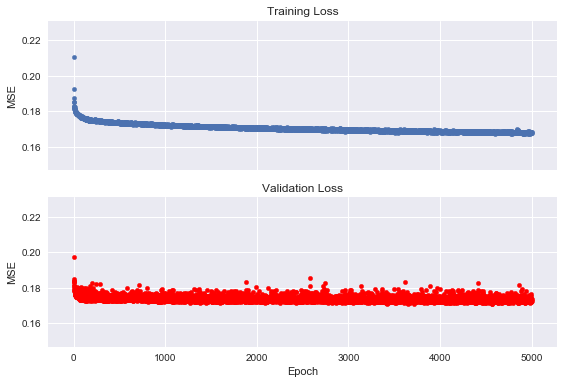

In [51]:
plot_loss(loss)

## Exercise

Classify the following data ([source](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)). You'll need to translate the classes into integers and make dummies. Design a neural network to classify the data and evaluate the results.

In [59]:
names = "fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist class".split()
df = pd.read_csv("../data/magic04.data", names=names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [60]:
d = {'g': 0, 'h': 1}
df["class"] = df["class"].apply(lambda x: d[x])

In [61]:
X = np.array(df[df.columns[:-1]])
y = np.array(df["class"])
y_cat = pd.get_dummies(y).values

print('Data Dimension:')
print('X: {}\ny: {}'.format(X.shape, y_cat.shape))

Data Dimension:
X: (19020, 10)
y: (19020, 2)


In [62]:
# Define a model to improve results
model = Sequential([
    Dense(input_dim=10, units=25, activation='tanh', name='hidden_1'),
    Dense(units=10, activation='tanh', name='hidden_2'),
    Dense(units=2, activation='softmax', name='output')
])

model.summary()

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [63]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.2, 
                 epochs=5000, 
                 batch_size=256, 
                 verbose=False)

final_loss(loss)

Training...
Final trainig loss: 0.0864751975
Final validation loss: 0.4020460768


In [64]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

ACCURACY:  0.79952681388
CONFUSION MATRIX:
 [[12127   205]
 [ 3608  3080]]


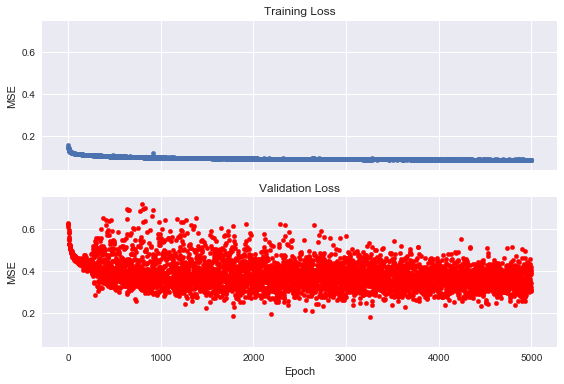

In [65]:
plot_loss(loss)